<a href="https://colab.research.google.com/gist/poacosta/7c85d782b57a3a7c5b7a7bc15314a27b/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Handwritten Digit Classification

This notebook demonstrates training a simple Convolutional Neural Network (CNN) to classify handwritten digits from the MNIST dataset.

In [5]:
# @title Load necessary libraries

import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

In [6]:
# @title Load the MNIST dataset

data = keras.datasets.mnist.load_data()

In [7]:
# @title Train/Test

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [8]:
# @title Preprocess the data

# Scale pixel values to the range [0, 1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Reshape images to have a single channel (grayscale)(28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convert class labels to one-hot encoded vectors
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [9]:
# @title Define the CNN model

# Create a sequential model
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

In [10]:
# @title Train the model

# Set hyperparameters
batch_size = 200
epochs = 60

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adamax", metrics=["accuracy"])

# Train the model and store the training history
result = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/60
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7297 - loss: 0.9396 - val_accuracy: 0.9665 - val_loss: 0.1229
Epoch 2/60
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9498 - loss: 0.1662 - val_accuracy: 0.9783 - val_loss: 0.0820
Epoch 3/60
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9632 - loss: 0.1231 - val_accuracy: 0.9823 - val_loss: 0.0662
Epoch 4/60
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9709 - loss: 0.0970 - val_accuracy: 0.9843 - val_loss: 0.0577
Epoch 5/60
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9755 - loss: 0.0816 - val_accuracy: 0.9860 - val_loss: 0.0508
Epoch 6/60
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9788 - loss: 0.0713 - val_accuracy: 0.9878 - val_loss: 0.0483
Epoch 7/60
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9786 - loss: 0.0691 - val_accuracy: 0.9880 - val_loss: 0.0458
Epoch 8/60
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9812 - loss: 0.0606 - val_accuracy: 

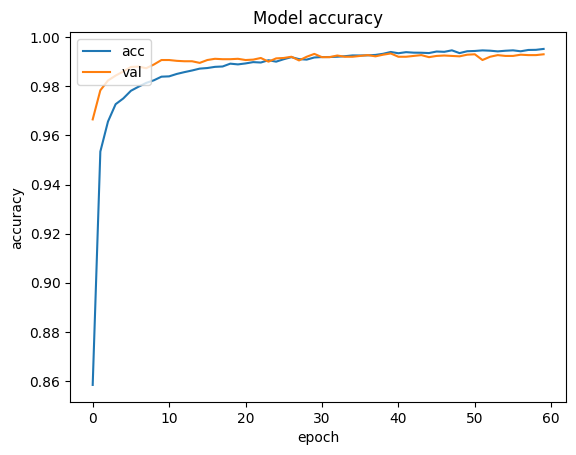

In [11]:
# @title Plot the training accuracy and validation accuracy

# Plot the training and validation accuracy curves
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val'], loc='upper left')
plt.show()

In [17]:
# @title Paint MNIST image

def paint_mnist(image):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i, ax in enumerate(axes.flat):
        ax.imshow(image[i], cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Shape: (10, 28, 28, 1)


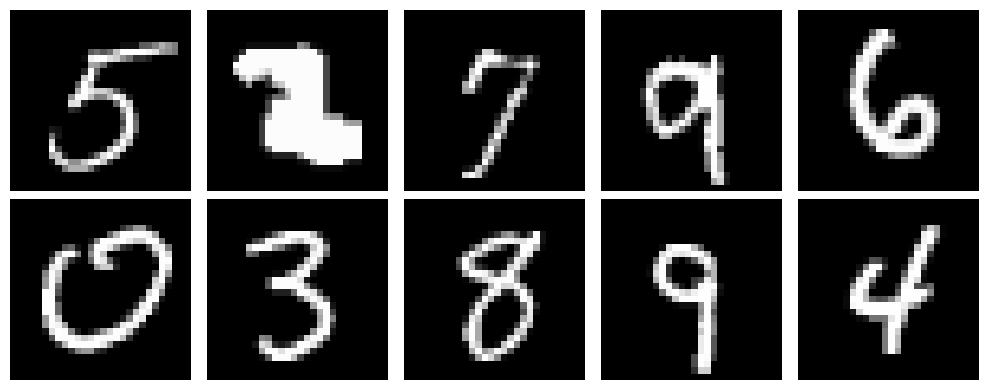

In [25]:
# @title Paint 10 randoms numbers of MNIST

import random

# Assuming x_train contains the MNIST images
random_indices = random.sample(range(len(x_train)), 10)
random_images = x_train[random_indices]

print(f"Shape: {random_images.shape}")

# Plot the images
paint_mnist(random_images)
